In [1]:
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt

# Train Model and save

In [14]:
path = 'D:\Classifier\Calssification2022_JZ\Code&Dataset\ThreeCasesinPaper\Case 1_TrajectoryGreaterThan10Frames\ClassificationConsideringHistoricalTrajectory\RUSBoost'

In [15]:
X_train = loadmat(os.path.join(path,'Train_Data.mat'))['Train_Data']
y_train = loadmat(os.path.join(path,'Train_Target.mat'))['Train_Target']
y_train = y_train.flatten()
X_test = loadmat(os.path.join(path,'Test_Data.mat'))['Test_Data']
y_test = loadmat(os.path.join(path,'Test_Target.mat'))['Test_Target']
y_test = y_test.flatten()
ind = [i for i in range(7) if (i !=0) & (i!= 4)&(i!=2)]
X_train = X_train[:,ind] 
X_test = X_test[:,ind] 

In [16]:
X_train = X_train[y_train != 4]
y_train = y_train[y_train != 4]
X_test = X_test[y_test != 4]
y_test = y_test[y_test != 4]

In [17]:
tree = DecisionTreeClassifier(max_depth=30)

In [18]:
rusboost = RUSBoostClassifier(base_estimator = tree, n_estimators=300,learning_rate=0.1
                          , random_state=0)
rusboost.fit(X_train, y_train) 

RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   learning_rate=0.1, n_estimators=300, random_state=0)

In [20]:
y_pred = rusboost.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[2904,    0,    0],
       [   0, 2660,    2],
       [   0,    0,  390]], dtype=int64)

In [22]:
balanced_accuracy_score(y_test, y_pred)  

0.9997495617330329

In [23]:
filename = 'D:\Lidar-Tracker\Classifier\Classifier.sav'
pickle.dump(rusboost, open(filename, 'wb'))

In [288]:
model = pickle.load(open(filename, 'rb'))

In [289]:
y_pred = model.predict(X_test)

In [218]:
confusion_matrix(y_test, y_pred)

array([[2904,    0,    0,    0],
       [   0, 2660,    0,    2],
       [   1,   19,  354,   16],
       [   0,   12,    1,  703]], dtype=int64)

In [13]:
data = pd.read_csv(r'D:\LiDAR_Data\MidTown\California\OutputFile\OutputTrajs/Trajctories_0.csv')


In [15]:
data.loc[data.Class == 2]

,ObjectID,FrameIndex,Coord_X_Mea,Coord_Y_Mea,Coord_Z_Mea,Distance_Mea,Longitude_Mea,Latitude_Mea,Elevation_Mea,Coord_X_Est,...,Latitude_Est,Elevation_Est,Point_Cnt,Dir_X_Bbox,Dir_Y_Bbox,Height,Length,Width,Area,Class
4,14.0,2.0,-30.628016,16.977386,0.0,35.018665,-119.810550,39.520510,1318.1101,-30.628016,...,39.520510,1318.1101,8.0,0.992053,0.125818,0.611463,1.293963,0.216572,0.280237,2
5,15.0,2.0,-28.032545,17.927560,0.0,33.274933,-119.810520,39.520520,1318.1073,-28.032545,...,39.520520,1318.1073,11.0,0.110398,0.993887,0.969572,0.924662,0.201768,0.186567,2
10,5.0,2.0,10.882906,-73.698890,0.0,74.498085,-119.810100,39.519688,1318.1896,10.882906,...,39.519688,1318.1896,9.0,0.984131,0.177445,2.184838,1.409190,0.801398,1.043420,2
11,5.0,3.0,10.884654,-73.710730,0.0,74.510056,-119.810100,39.519688,1318.1896,10.884654,...,39.519688,1318.1896,8.0,0.820968,-0.570974,1.788182,1.409190,0.960379,1.353357,2
12,5.0,4.0,10.882038,-73.693016,0.0,74.492150,-119.810100,39.519688,1318.1896,10.882038,...,39.519688,1318.1896,9.0,0.989205,0.146536,1.790887,1.409190,0.912438,1.186419,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254402,112329.0,17945.0,-116.418570,-35.592730,0.0,121.737946,-119.811554,39.520073,1318.2283,-116.418570,...,39.520073,1318.2283,8.0,0.071775,-0.997421,0.707542,1.719867,0.369116,0.634831,2
254431,112333.0,17946.0,-6.240321,-5.618810,0.0,8.397180,-119.810270,39.520300,1318.1206,-6.240321,...,39.520300,1318.1206,8.0,0.991601,0.129336,0.170372,0.674964,0.117175,0.079089,2
254432,112333.0,17947.0,-6.236924,-5.576453,0.0,8.366364,-119.810270,39.520300,1318.1206,-6.236924,...,39.520300,1318.1206,5.0,0.988603,0.150543,0.098125,0.674964,0.101196,0.039639,2
254445,112349.0,17949.0,-6.296733,-5.473666,0.0,8.343252,-119.810270,39.520300,1318.1205,-6.296733,...,39.520300,1318.1205,8.0,0.988684,0.150015,0.128318,0.515824,0.075876,0.039138,2


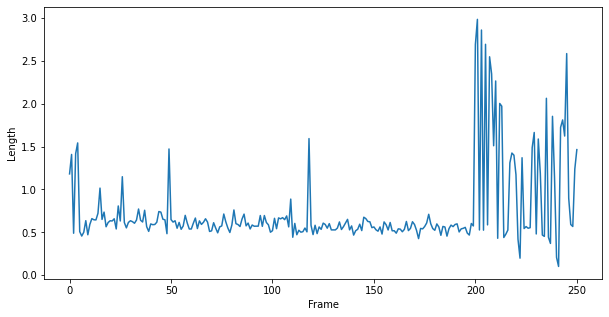

In [463]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(ped)),ped.Length)
plt.xlabel('Frame')
plt.ylabel('Length')
plt.show()

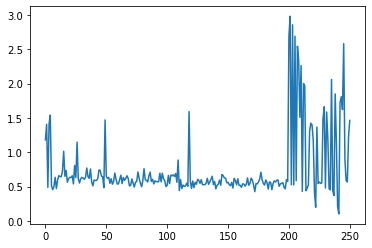

In [430]:
plt.plot(np.arange(len(ped)),ped.Length)

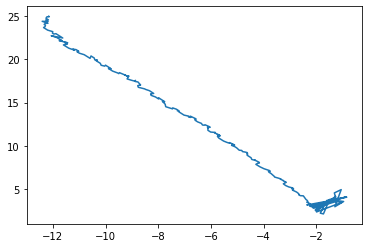

In [431]:
plt.plot(ped.Coord_X_Est,ped.Coord_Y_Est)

In [55]:
data = pd.read_csv(r'D:\LiDAR_Data\MidTown\California\OutputFile\OutputTrajs/Trajctories_0_post.csv')


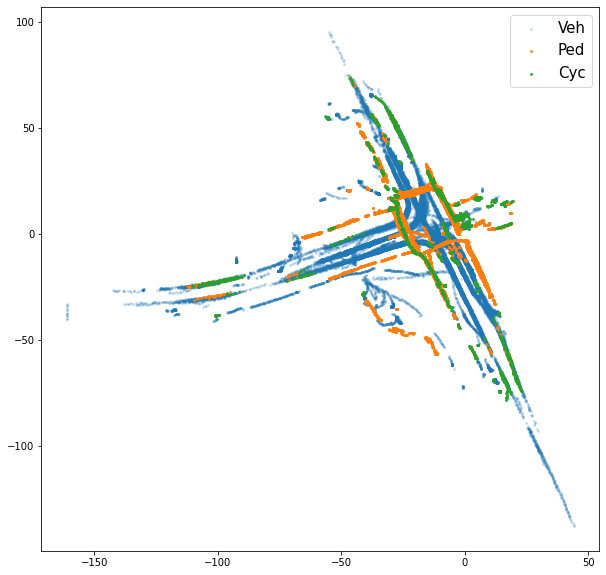

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(trajs.loc[trajs.Class == 1,'Coord_X_Mea'],trajs.loc[trajs.Class == 1,'Coord_Y_Mea'], s = 3, alpha = 0.2,label = 'Veh')
plt.scatter(trajs.loc[trajs.Class == 2,'Coord_X_Mea'],trajs.loc[trajs.Class == 2,'Coord_Y_Mea'], s = 3, label = 'Ped')
plt.scatter(trajs.loc[trajs.Class == 3,'Coord_X_Mea'],trajs.loc[trajs.Class == 3,'Coord_Y_Mea'], s = 3,label = 'Cyc')
plt.legend(fontsize = 15)
plt.show()

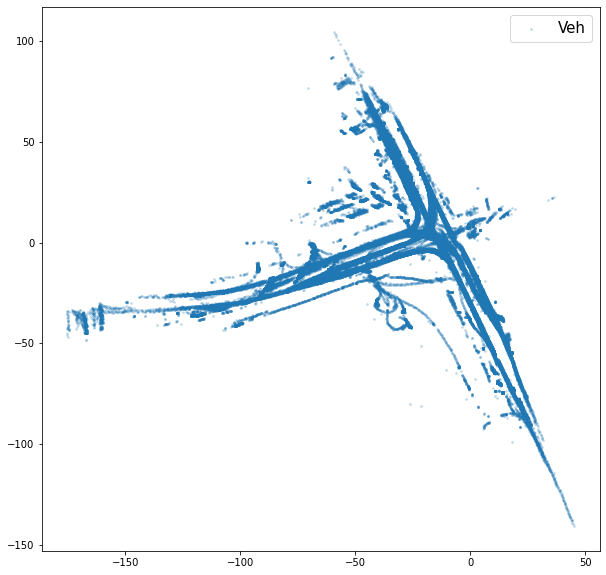

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(data.loc[data.Class == 1,'Coord_X_Mea'],data.loc[data.Class == 1,'Coord_Y_Mea'], s = 3, alpha = 0.2,label = 'Veh')
plt.scatter(data.loc[data.Class == 2,'Coord_X_Mea'],data.loc[data.Class == 2,'Coord_Y_Mea'], s = 3, label = 'Ped')
plt.scatter(data.loc[data.Class == 3,'Coord_X_Mea'],data.loc[data.Class == 3,'Coord_Y_Mea'], s = 3,label = 'Cyc')
plt.legend(fontsize = 15)
plt.show()

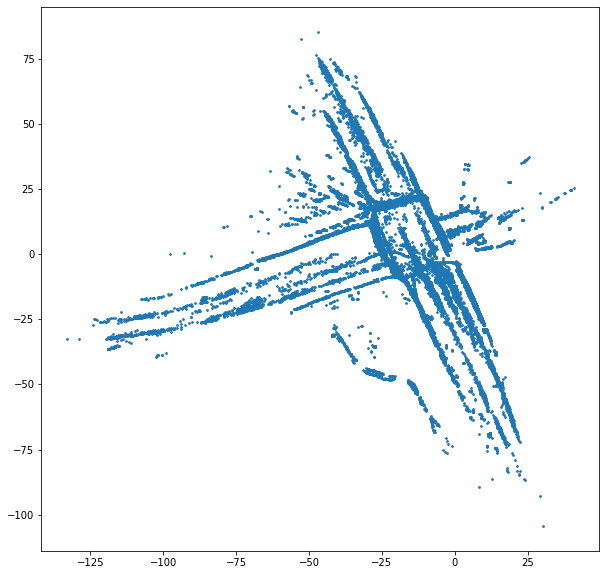

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(data.loc[data.Class == 2,'Coord_X_Mea'],data.loc[data.Class == 2,'Coord_Y_Mea'], s = 3, label = 'Ped')


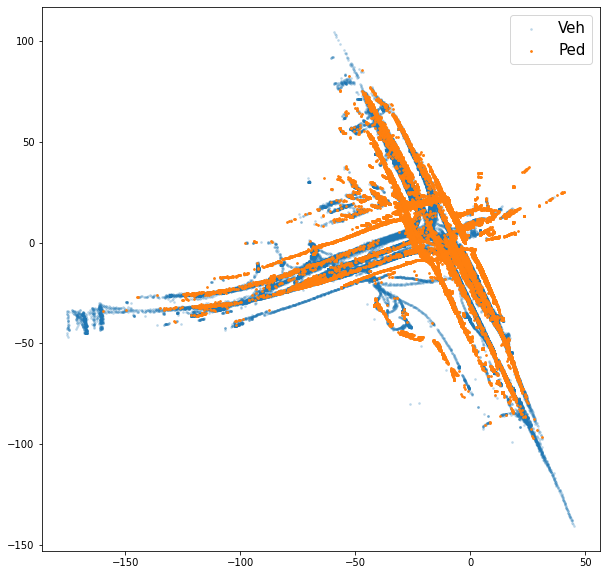

In [470]:
plt.figure(figsize=(10,10))
plt.scatter(data.loc[data.Class == 1,'Coord_X_Mea'],data.loc[data.Class == 1,'Coord_Y_Mea'], s = 3, alpha = 0.2,label = 'Veh')
plt.scatter(data.loc[data.Class == 2,'Coord_X_Mea'],data.loc[data.Class == 2,'Coord_Y_Mea'], s = 3, label = 'Ped')
plt.legend(fontsize = 15)
plt.show()

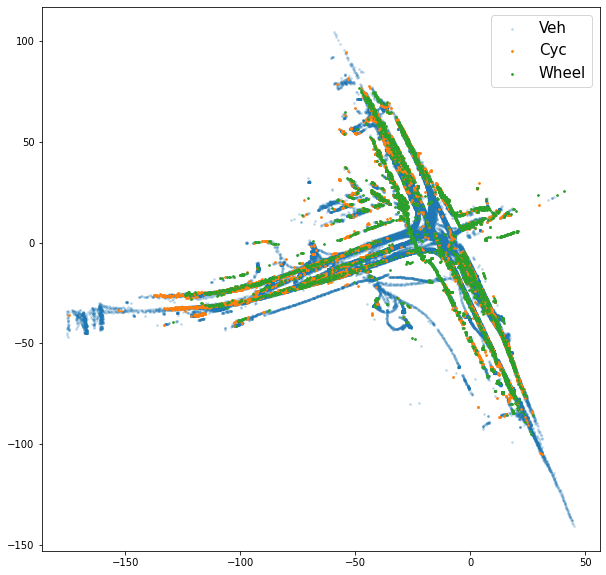

In [450]:
plt.figure(figsize=(10,10))
plt.scatter(data.loc[data.Class == 1,'Coord_X_Mea'],data.loc[data.Class == 1,'Coord_Y_Mea'], s = 3, alpha = 0.2,label = 'Veh')
plt.scatter(data.loc[data.Class == 3,'Coord_X_Mea'],data.loc[data.Class == 3,'Coord_Y_Mea'], s = 3,label = 'Cyc')
plt.scatter(data.loc[data.Class == 4,'Coord_X_Mea'],data.loc[data.Class == 4,'Coord_Y_Mea'], s = 3,label = 'Wheel')
plt.legend(fontsize = 15)
plt.show()

In [5]:
(data.Class == 1).sum()

196940

In [6]:
(data.Class == 2).sum()

38401

In [7]:
(data.Class == 3).sum()

11691

In [8]:
(data.Class == 4).sum()

7861

In [9]:
data.loc[data.Class == 1].to_csv(r'D:\LiDAR_Data\MidTown\TrajsGEO\veh.csv')

In [10]:
data.loc[data.Class == 2].to_csv(r'D:\LiDAR_Data\MidTown\TrajsGEO\ped.csv')

In [11]:
data.loc[data.Class == 3].to_csv(r'D:\LiDAR_Data\MidTown\TrajsGEO\cyc.csv')

In [12]:
data.loc[data.Class == 4].to_csv(r'D:\LiDAR_Data\MidTown\TrajsGEO\wheel.csv')

In [87]:
Traj = pd.read_csv('D:/LiDAR_Data/MidTown/California/OutputFile/OutputTrajs/Trajctories_1.csv')
Trajs = []
for i,g in Traj.groupby('ObjectID'):
    Trajs.append(g)

In [321]:
Traj = pd.read_csv('D:/LiDAR_Data/MidTown/California/OutputFile/OutputTrajs/Trajctories_0.csv')

In [323]:
Traj = pd.read_csv('D:/LiDAR_Data/MidTown/California/OutputFile/OutputTrajs/Trajctories_0.csv')
pred = model.predict(np.array(data.loc[:,['Point_Cnt','Height','Length','Area']]))

In [122]:
from sklearn.neighbors import NearestNeighbors

In [135]:
Coord_cur = np.array(Traj.loc[Traj.FrameIndex == 2,['Coord_X_Mea','Coord_Y_Mea']])
Coord_next = np.array(Traj.loc[Traj.FrameIndex == 3,['Coord_X_Mea','Coord_Y_Mea']])